# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR с указанием проверяющего

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [ ]:
%%bash
gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 24.9MB/s]


Начнем с необходимых приготовлений.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [ ]:
coins = pd.read_csv("coins.csv")

Посмотрим что получилось

In [ ]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
3,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [ ]:
print(coins['name'].nunique())

70


### 2. За какой период данные мы имеем? (0.4 балла)

In [ ]:
print(f"From {coins['date'].min()} to {coins['date'].max()}.")

From 2013-04-28 to 2018-06-06.


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [ ]:
for label, content in coins.items():
    if coins.isnull().sum()[label] > 0:
        print(f'{label}:{coins.isnull().sum()[label]}')

price:327
txCount:1520
txVolume:1830
activeAddresses:1520


### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [ ]:
max_price_row = coins.loc[coins['high'].idxmax()]

print(f"Самая высокая цена была у монеты '{max_price_row['name']}' - {max_price_row['high']} в {max_price_row['date']}")

Самая высокая цена была у монеты 'Bitcoin' - 20089.0 в 2017-12-17


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

Самая высокая средняя капитализация у монеты 'Bitcoin': 30782136351.01822
Самая низкая средняя капитализация у монеты 'KingN Coin': 41600.98431372549


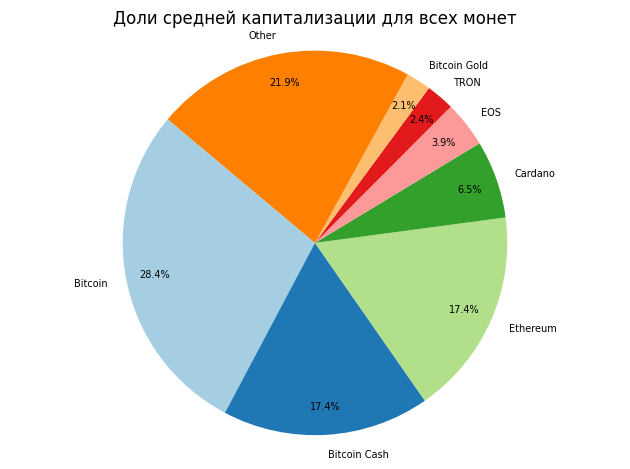

In [ ]:
mean_capitalization = coins.groupby('name')['market'].mean()

sum_of_market = mean_capitalization.sum()

max_cap_coin = mean_capitalization.idxmax()
max_cap_value = mean_capitalization.max()
print(f"Самая высокая средняя капитализация у монеты '{max_cap_coin}': {max_cap_value}")

min_cap_coin = mean_capitalization.idxmin()
min_cap_value = mean_capitalization.min()
print(f"Самая низкая средняя капитализация у монеты '{min_cap_coin}': {min_cap_value}")

filtered_data = mean_capitalization.sort_values(ascending=False)
filtered_data.loc['Other'] = 0
for name, value in filtered_data.items():
  if value / sum_of_market <= 0.02 and name != 'Other':
    filtered_data['Other'] += value
    filtered_data.drop(name, inplace=True)

labels = filtered_data.index
sizes = filtered_data.values
colors = plt.cm.Paired(range(len(labels)))

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, textprops={'fontsize': 7})
plt.axis('equal')
plt.title('Доли средней капитализации для всех монет')
plt.tight_layout()

plt.show()


## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [ ]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    price_data = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]

    if price_data.empty:
        print(f"No data available for symbol {symbol} in the specified date range.")
        return

    plt.figure(figsize=(10, 6))
    plt.plot(price_data['date'], price_data['open'], label='Open', marker='.', color='green')
    plt.plot(price_data['date'], price_data['close'], label='Close', marker='.', color='red')
    plt.scatter(price_data['date'], price_data['high'], label='High', color='blue', marker='^')
    plt.scatter(price_data['date'], price_data['low'], label='Low', color='purple', marker='v')

    plt.title(f'Price Action for {symbol} ({start_date} to {end_date})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(price_data['date'][::8], rotation=45, ha='right', fontsize=7)
    plt.legend()
    plt.grid(True)
    plt.show()

Посмотрим, что получилось:

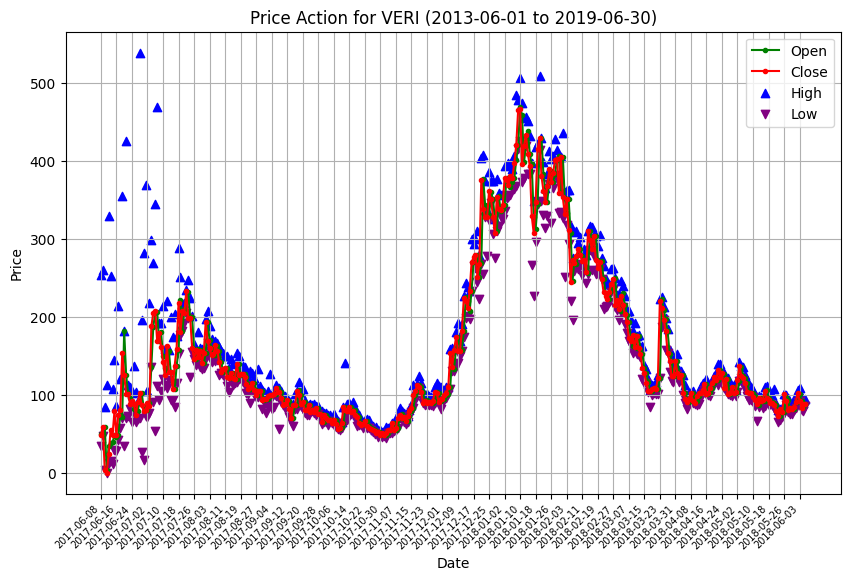

In [ ]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [ ]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    coin_data = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)].copy()

    if coin_data.empty:
        return None, None

    coin_data['pnd'] = coin_data['high'] / coin_data[['open', 'close']].max(axis=1)

    if coin_data['pnd'].empty:
        return None, None

    max_pnd_row = coin_data.loc[coin_data['pnd'].idxmax()]

    max_pnd_date = max_pnd_row['date']
    max_pnd_value = max_pnd_row['pnd']

    return max_pnd_date, max_pnd_value

In [ ]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

('2017-11-29', 1.1428940004366206)

Сравните эти значения для разных монет:

In [ ]:
names = coins['name'].unique()
example_time_start = '2016-01-01'
example_time_finish = '2017-12-31'
for name in names:
  date, pnd = find_most_severe_pump_and_dump(coins, name, example_time_start, example_time_finish)
  if(date != None and pnd != None):
    print(name, ':', pnd, 'in', date)

PIVX : 4.384740637357525 in 2016-08-18
NEO : 2.3759063310539967 in 2016-10-25
EOS : 1.3202933985330074 in 2017-07-03
SALT : 1.227206946454414 in 2017-09-29
QASH : 1.6658378856041132 in 2017-11-23


## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [233]:
def compute_roi(coins, investments, start_date, end_date):
    selected_data = coins[(coins['date'] >= start_date) & (coins['date'] <= end_date)]

    initial_portfolio_value = 0
    final_portfolio_value = 0

    for sum in investments.values():
      initial_portfolio_value += sum

    for symbol in investments:
      coin_data = selected_data[(selected_data['symbol'] == symbol)]
      start_price = coin_data[(coin_data['date'] == start_date)]['price'].max()
      end_price = coin_data[(coin_data['date'] == end_date)]['price'].max()
      final_portfolio_value += investments[symbol] * end_price / start_price

    if initial_portfolio_value != 0:
        roi = final_portfolio_value / initial_portfolio_value
        return roi
    else:
        return 0

In [234]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

0.9644308669347244

In [235]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

52.28330296529592

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [ ]:
def plot_bollinger_bands(coins, symbol, window, width):
    coin_data = coins[coins['symbol'] == symbol].copy()

    coin_data['MA'] = coin_data['close'].rolling(window=window).mean()
    coin_data['std'] = coin_data['close'].rolling(window=window).std()

    coin_data['upper_band'] = coin_data['MA'] + width * coin_data['std']
    coin_data['lower_band'] = coin_data['MA'] - width * coin_data['std']

    plt.figure(figsize=(12, 6))
    plt.plot(coin_data['date'], coin_data['close'], label='Цена', color='blue')
    plt.plot(coin_data['date'], coin_data['MA'], label=f'Скользящее среднее ({window} дней)', color='orange')
    plt.plot(coin_data['date'], coin_data['upper_band'], label='Верхняя граница Боллинджера', color='red', linestyle='--')
    plt.plot(coin_data['date'], coin_data['lower_band'], label='Нижняя граница Боллинджера', color='green', linestyle='--')

    plt.title(f'Bollinger Bands for {symbol} with Window {window} and Width {width}')
    plt.xlabel('Дата')
    plt.ylabel('Цена')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xticks(coin_data['date'][::8], rotation=45, ha='right', fontsize=7)
    plt.tight_layout()

    plt.show()

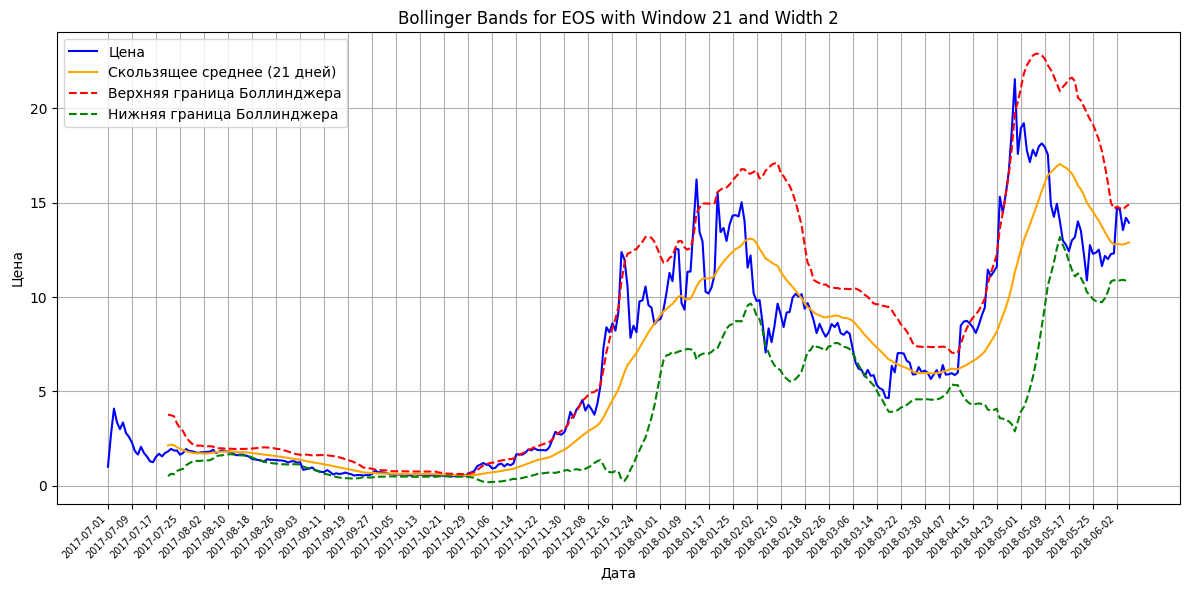

In [ ]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

По данному графику можно заметить, что цена почти всегда в границах Боллинджера, так что можно заметить частое отражение графика цен от границ в точках негативных и позитивных пик. По всему вышесказанному можно сделать вывод, что в данном случае правило работало.


## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [ ]:
def plot_coins_capitalizations(coins, symbols, start_date):
    filtered_coins = coins[coins['date'] >= start_date]

    filtered_coins = filtered_coins[filtered_coins['symbol'].isin(symbols)]

    grouped_coins = filtered_coins.groupby('date')['market'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    plt.plot(grouped_coins['date'], grouped_coins['market'], label='Общая капитализация', color='blue')
    plt.title('Общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)')
    plt.xlabel('Дата')
    plt.ylabel('Капитализация (в USD)')
    plt.legend(loc='best')
    plt.xticks(grouped_coins['date'][::8], rotation=45, ha='right', fontsize=7)
    plt.grid(True)

    plt.figure(figsize=(12, 6))
    for symbol in symbols:
        coin_data = filtered_coins[filtered_coins['symbol'] == symbol]
        merged_data = pd.merge(coin_data[['date', 'market']], grouped_coins[['date', 'market']], on='date', suffixes=('_coin', '_grouped'))
        merged_data['market_result'] = merged_data['market_coin'] / merged_data['market_grouped']
        merged_data['market_result'] = merged_data['market_result'].fillna(0)
        plt.plot(coin_data['date'], merged_data['market_result'], label=symbol)

    plt.title('Доля капитализаций биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)')
    plt.xlabel('Дата')
    plt.ylabel('Доля капитализации')
    plt.legend(loc='best')
    plt.xticks(grouped_coins['date'][::8], rotation=45, ha='right', fontsize=7)
    plt.grid(True)

    plt.show()

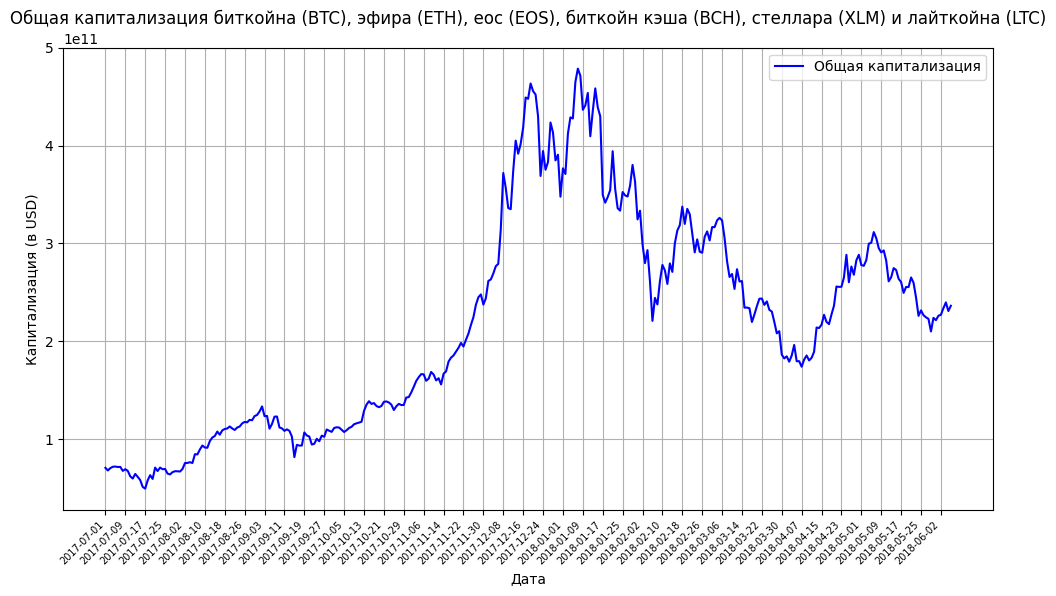

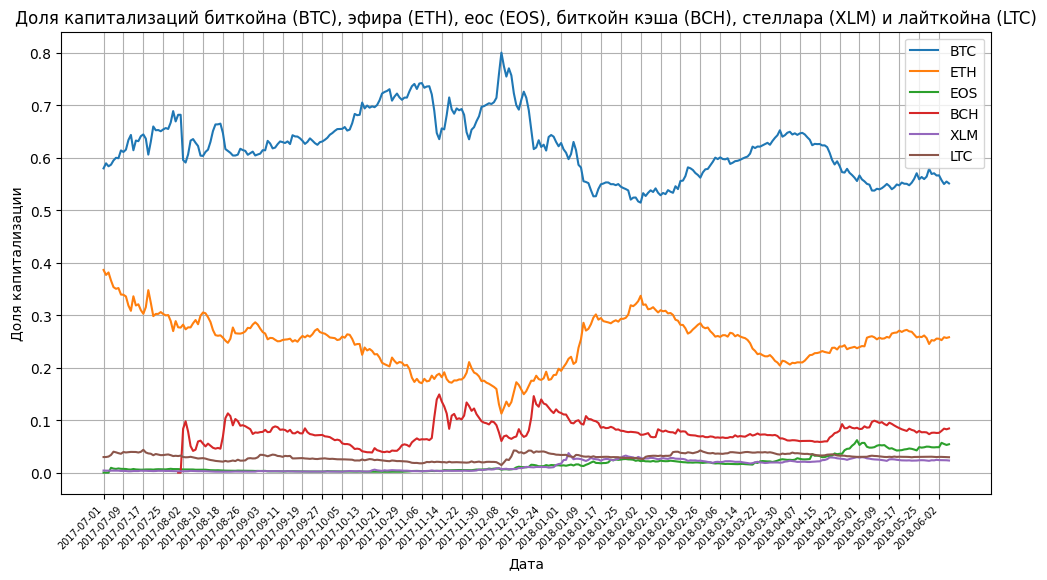

In [ ]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Конкретно в случае с ETH у них явный график двух конкурентов, делящих по сути весь рынок. На положительные пики биткоина приходятся негативные пики эфира и то же самое верно в обратную сторону. Чуть в меньшей степени такую же симметриию можно рассмотреть в случае с BCH - люди меняют активы в другие популярные криптовалюты при потере доверия к биткоину, после восстановления доверия часть этих активов возвращается. Какой либо корелляции в случае с другими криптовалютами я не заметил.

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

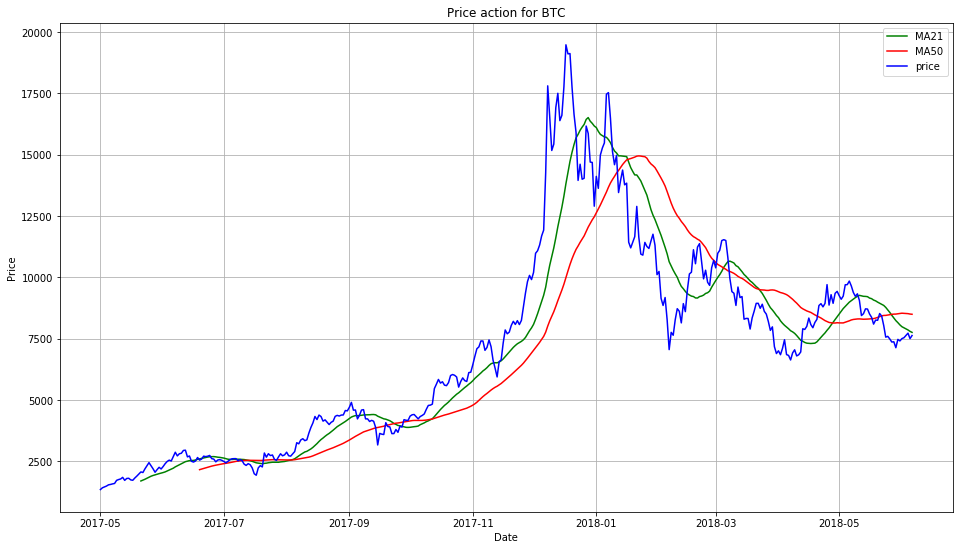

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.